In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [2]:
parameter_name = 'pressure'

In [3]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_DATA = os.path.join(BASE_DIRECTORY, 'data')

PATH_TO_DATA

'D:\\albert\\programming\\git_reps\\molecular_dynamics\\data'

In [4]:
date = '2021-09-28'
postfix = ''
filename = os.path.join(PATH_TO_DATA, date + postfix, f'log_{date}.log')
# filename = os.path.join(PATH_TO_DATA, date + postfix, f'log_{date}.{date}_13-30-56_051712.log')

In [5]:
PARAMETERS = {
    'temperature': ('Temperature', r'Temperature, $\epsilon / k_B $'),
    'pressure': ('Pressure', r'Pressure, $\epsilon / \sigma^3 $'),
    'volume': ('Volume', r'Volume, $\sigma^3 $'),
    'density': ('Density', r'Density, $\sigma^{-3} $'),
    'potential_energy': ('Potential energy', r'Potential energy, $\epsilon$'),
    'total_energy': ('Total energy', r'Total energy, $\epsilon$'),
    'msd_cur': ('Current MSD', r'Mean Squared Displacement (current), $\sigma^2$'),
    'msd_cum': ('Cumulative MSD', r'Mean Squared Displacement (cumulative), $\sigma^2$'),
    'diffusion_cur': ('Current Diffusion', r'Self-Diffusion Coefficient (current), $\sigma^2 / \tau $'),
    'diffusion_cum': ('Cumulative Diffusion', r'Self-Diffusion Coefficient (cumulative), $\sigma^2 / \tau $'),
}

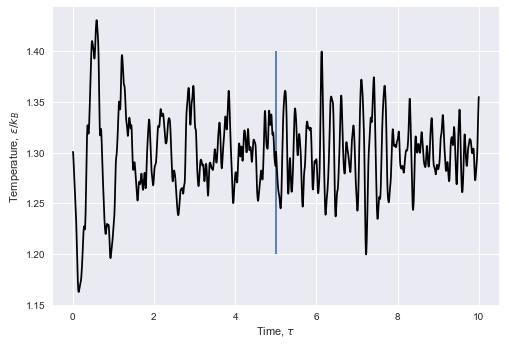

In [6]:
parameters = []
parameter_name = 'temperature'

with open(filename) as file:
    for line in file:
        if f'{PARAMETERS[parameter_name][0]} after ' in line and '.stage_2()' in line:
            parameters.append(line[line.index('DEBUG') :-2])

for i, parameter in enumerate(parameters):
    parameters[i] = float(parameter[parameter.index(':') + 2: ])

parameters = np.array(parameters)

plt.plot(
    np.arange(parameters.size) * 0.005 + 0.005,
    parameters,
#     s=5,
    color='black'
);
plt.xlabel(r'Time, $\tau$');
plt.ylabel(PARAMETERS[parameter_name][1]);
plt.xlim(
#     left=25, 
#     right=75,
);
plt.ylim(
#     bottom=0, 
#     top=1.5,
);
plt.vlines(5.0, 1.2, 1.4)

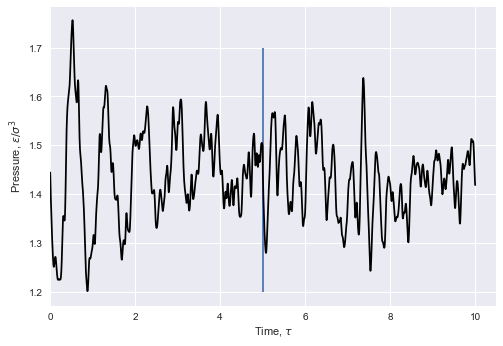

In [7]:
parameters = []
parameter_name = 'pressure'

with open(filename) as file:
    for line in file:
        if f'{PARAMETERS[parameter_name][0]} after ' in line and '.stage_2()' in line:
            parameters.append(line[line.index('DEBUG') :-2])

for i, parameter in enumerate(parameters):
    parameters[i] = float(parameter[parameter.index(':') + 2: ])

parameters = np.array(parameters)

plt.plot(
    np.arange(parameters.size) * 0.005 + 0.005,
    parameters,
#     s=5,
    color='black'
);
plt.xlabel(r'Time, $\tau$');
plt.ylabel(PARAMETERS[parameter_name][1]);
plt.xlim(left=0);
plt.ylim(
#     bottom=0, 
#     top=2,
);
plt.vlines(5.0, 1.2, 1.7)

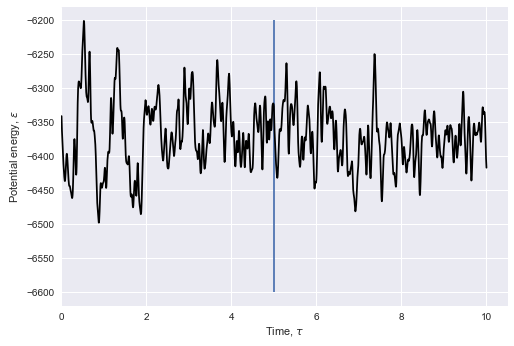

In [8]:
parameters = []
parameter_name = 'potential_energy'

with open(filename) as file:
    for line in file:
        if f'{PARAMETERS[parameter_name][0]} after ' in line and '.stage_2()' in line:
            parameters.append(line[line.index('DEBUG') :-2])

for i, parameter in enumerate(parameters):
    parameters[i] = float(parameter[parameter.index(':') + 2: ])

parameters = np.array(parameters)

plt.plot(
    np.arange(parameters.size) * 0.005 + 0.005,
    parameters,
#     s=5,
    color='black'
);
plt.xlabel(r'Time, $\tau$');
plt.ylabel(PARAMETERS[parameter_name][1]);
plt.xlim(left=0);
plt.ylim(
#     bottom=0, 
#     top=0,
);

plt.vlines(5.0, -6.6e3, -6.2e3)

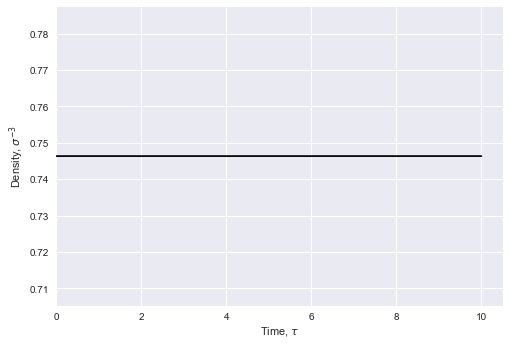

In [9]:
parameters = []
parameter_name = 'density'

with open(filename) as file:
    for line in file:
        if f'{PARAMETERS[parameter_name][0]} after ' in line and '.stage_2()' in line:
            parameters.append(line[line.index('DEBUG') :-2])

for i, parameter in enumerate(parameters):
    parameters[i] = float(parameter[parameter.index(':') + 2: ])

parameters = np.array(parameters)

plt.plot(
    np.arange(parameters.size) * 0.005 + 0.005,
    parameters,
#     s=5,
    color='black'
);
plt.xlabel(r'Time, $\tau$');
plt.ylabel(PARAMETERS[parameter_name][1]);
plt.xlim(left=0);
plt.ylim(
#     bottom=0, 
#     top=10000,
);

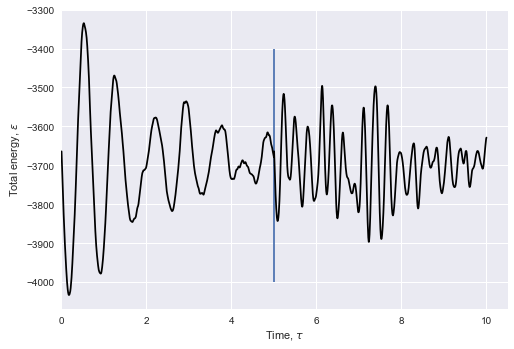

In [10]:
parameters = []
parameter_name = 'total_energy'

with open(filename) as file:
    for line in file:
        if f'{PARAMETERS[parameter_name][0]} after ' in line and '.stage_2()' in line:
            parameters.append(line[line.index('DEBUG') :-2])

for i, parameter in enumerate(parameters):
    parameters[i] = float(parameter[parameter.index(':') + 2: ])

parameters = np.array(parameters)

plt.plot(
    np.arange(parameters.size) * 0.005 + 0.005,
    parameters,
#     s=5,
    color='black'
);
plt.xlabel(r'Time, $\tau$');
plt.ylabel(PARAMETERS[parameter_name][1]);
plt.xlim(left=0);
plt.ylim(
#     bottom=0, 
#     top=0,
);

plt.vlines(5.0, -4e3, -3.4e3)